In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta 

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
session = Session(engine)

In [27]:
last_day_string = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_day_string

('2017-08-23')

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [29]:
end_date = str(last_day_string)[2:-3]
end_date

'2017-08-23'

In [31]:
start_date = str(eval(end_date[0:4])-1)+ end_date[4:]
start_date

'2016-08-23'

In [35]:
last_12_month_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > start_date).\
    order_by(Measurement.date).all()
last_12_month_prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

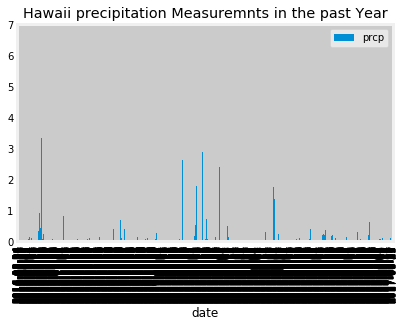

In [39]:
df = pd.DataFrame(last_12_month_prcp, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.title ("Hawaii precipitation Measuremnts in the past Year")
plt.show()

In [40]:
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [41]:
station_list_id = session.query(Station.id)

In [43]:
station_list_id.count()

9

In [45]:
station_results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by (Measurement.station).\
    order_by (func.count(Measurement.station).desc())
for row in station_results:
    print (row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [ ]:
# 'USC00519281' has the highest number of oberservations 

In [49]:
sel = [Measurement.station,
func.avg(Measurement.tobs),
func.min(Measurement.tobs),
func.max(Measurement.tobs)
      ]
station_desc = session.query(*sel).group_by(Measurement.station).\
    filter(Measurement.station == 'USC00519281')
for row in station_desc:
    print (row)
  

('USC00519281', 71.66378066378067, 54.0, 85.0)


In [60]:
tobs_past_12_month_9821 = session.query(Measurement.tobs).\
    filter(Measurement.date > start_date).\
    filter(Measurement.station =='USC00519281').\
    order_by(Measurement.tobs).all()
for row in tobs_past_12_month_9821:
    print(row)

(59.0,)
(59.0,)
(59.0,)
(60.0,)
(60.0,)
(61.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(63.0,)
(63.0,)
(63.0,)
(63.0,)
(64.0,)
(64.0,)
(64.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)


In [62]:
df=pd.DataFrame(tobs_past_12_month_9821,columns = ['Temp'])
df.head()

,Temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


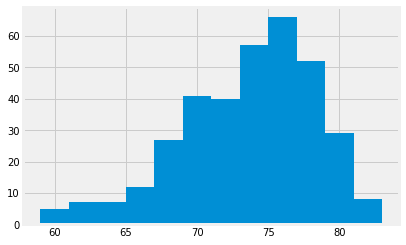

In [68]:
plt.hist(df['Temp'],bins =12)
plt.title = ('Temperature Result during the past 12 months')
plt.xlable = ('bins')
plt.ylabel = ('temps')
plt.show()

In [70]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [75]:
trip_temp_summary = (calc_temps('2017-06-06', '2017-06-31'))
trip_temp_summary

[(71.0, 77.0875, 83.0)]

In [84]:
df=pd.DataFrame(trip_temp_summary,columns = ['min','avg','max'])
df.head()

,min,avg,max
0,71.0,77.0875,83.0


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
??????

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
from flask import Flask, jsonify
app = Flask(_name_)

In [ ]:
@app.route("/")
def home():
    return "Hello, Welcome to weather forecast"

In [ ]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    prcp_reslut = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > start_date).\
    order_by(Measurement.date).all()
    p_dict = dict(prcp_reslut)
    return jsonify(p_dict)

In [ ]:
@app.route("/api/v1.0/stations")
def precipitation():
    station_list = session.query(Station.station).\
    order_by(Station.station).all()
    return jsonify(station_list)

In [ ]:
@app.route("/api/v1.0/tobs")
def tobs():
    tobs_results = session.query(Measurement.tobs).\
    order_by(Measurement.date).all()
    return jsonify(tobs_results)

In [ ]:
@app.route('/api/v1.0/<start>')
def combined_start_stat(start):
       q =  session.query(Station.id,Station.station,func.avg(Measurement.tobs),
    func.min(Measurement.tobs),
    func.max(Measurement.tobs)).\
    filter (Measurement.station == Station.station).\
    filter (Measurement.date >= start_date).all()

return jsonify(q)
           

In [ ]:
@app.route('/api/v1.0/<start>/<end>')
def combined_start_stat(start,end):
       q =  session.query(Station.id,Station.station,func.avg(Measurement.tobs),
    func.min(Measurement.tobs),
    func.max(Measurement.tobs)).\
    filter (Measurement.station == Station.station).\
    filter (Measurement.date <= end_date).\
    filter (Measurement.date >= start_date).all()

return jsonify(q)

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
